<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/9_nlp_with_tensorflow/3_recurrent_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Intro to Recurrent Neural Networks(RNNs)

## Contents 

* [1. Intro to Recurrent Neural Networks](#1)
* [2. RNNs In Practice: Movies Sentiment Analysis](#2)
   * [2.1 Getting the data](#2-1)
   * [2.2 Preparing the data](#2-2)
   * [2.3 Building, compiling and training a RNN model](#2-3)
   * [2.4 Visualizing the model results](#2-4)

* [3. Intro to Long Short Terms Memories](#3)
* [4. LSTMs in Practice : News Classification](#4)
   * [4.1 Getting the data](#4-1)
   * [4.2 Preparing the data](#4-2)
   * [4.3 Building and training a RNN model](#4-3)
   * [4.4 Visualizing the model results](#4-4)
   * [4.5 Using Stacked LSTMs](#4-5)
   * [4.6 Using Gate Recurrent Unit(GRU)](#4-6)

* [5. Further Learning](#5)


<a name='1'></a>
# 1. Intro to Recurrent Neural Networks (RNN)

Recurrent Neural Networks (RNNs) are  neural network architecture that is suited for handling sequential datasets. Sequential datasets are these types of datasets that has some forms of sequence such as: sound(a sequence of sound waves), texts (sequence of words or characters), and time series.

When you are working with sequential data (say texts), you want to preserve the sequence of the information. 

Take an example: Given the sentence `To day, I took my cat for a [....]`, can you predict the next word? In order for a machine to predict the next word in that sentence, there should be a way to maintain the flow and the sequence of the words, not only from the input to output, but also having a backward connection at each time step. That is where the notion of `recurrence` comes from. 

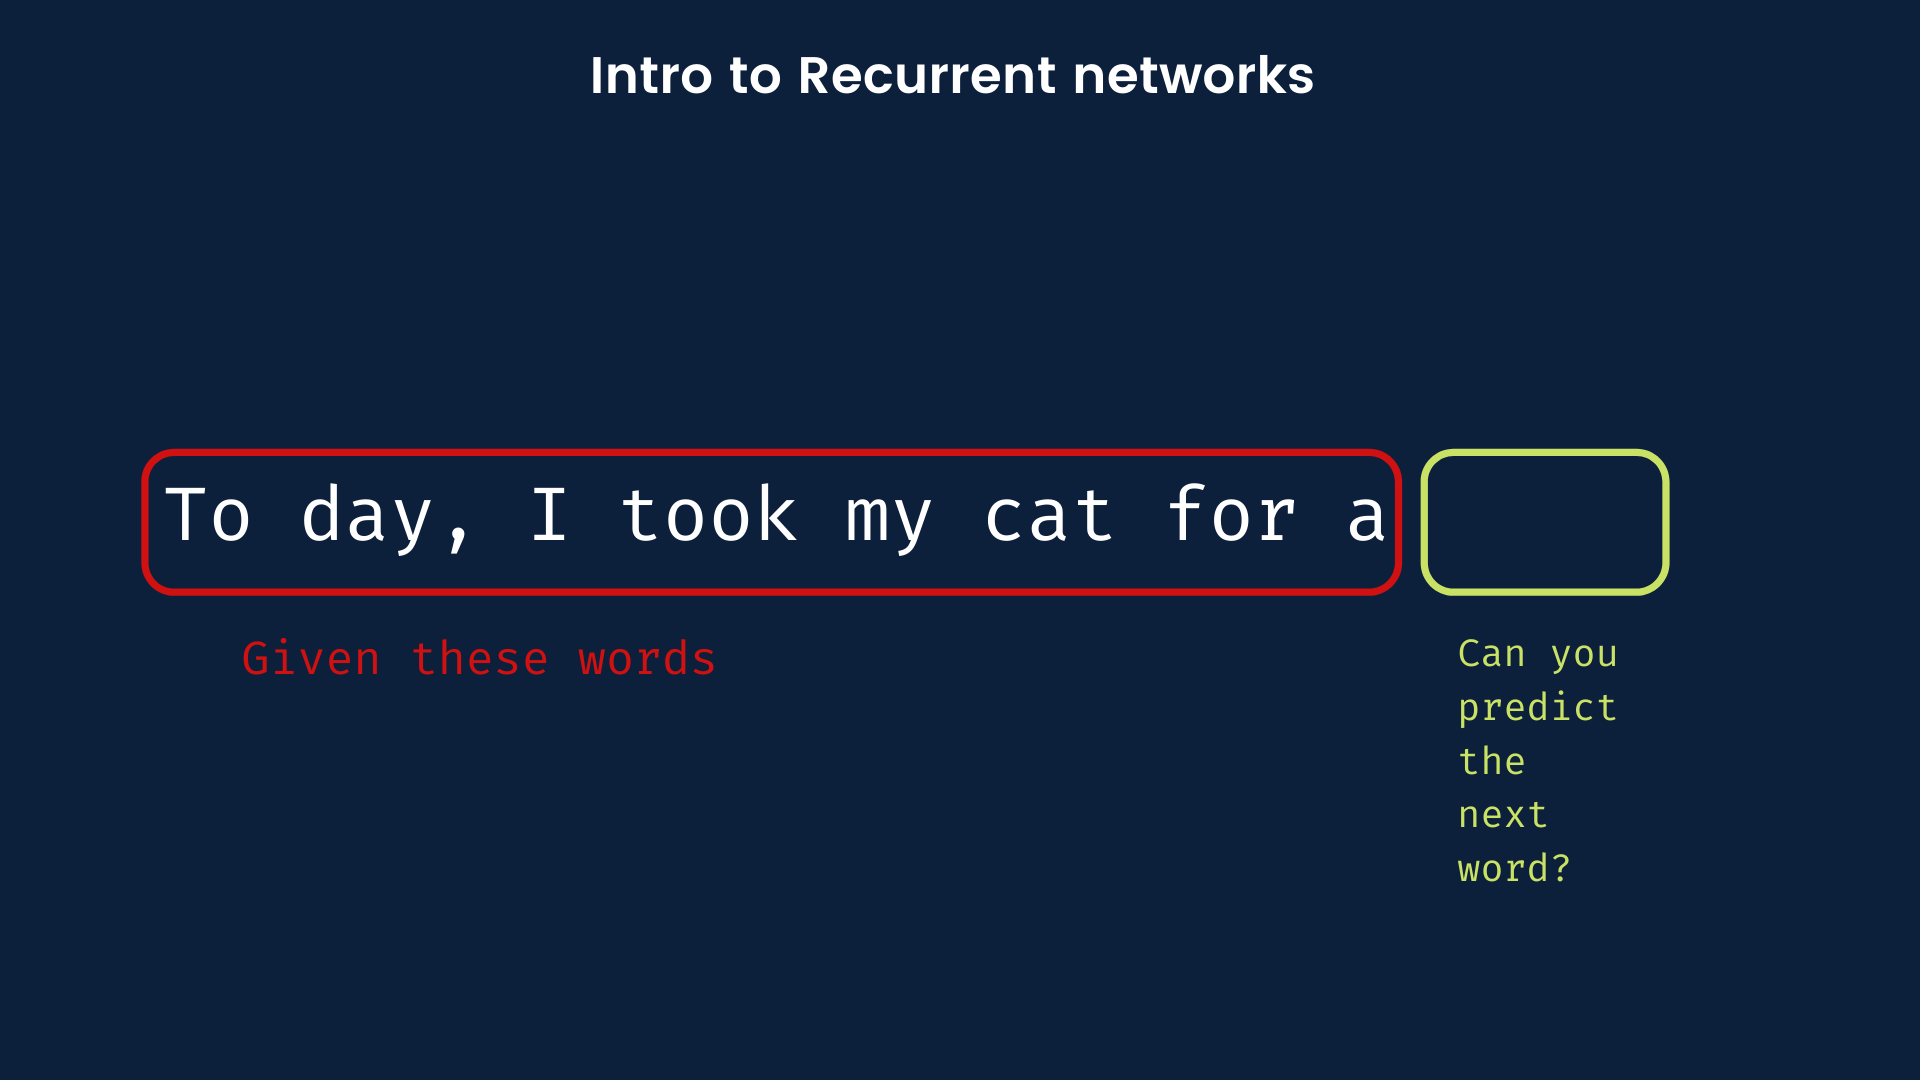


The conventional feedforward networks have a constant flow of information: The data goes straight from the input to output, whereas in RNNs, there is a feedback loop of data at each time step. Also, the input dimension of data to be fed to feedforward network is fixed, whereas RNNs can handle the data of variable input lengths/dimension. 


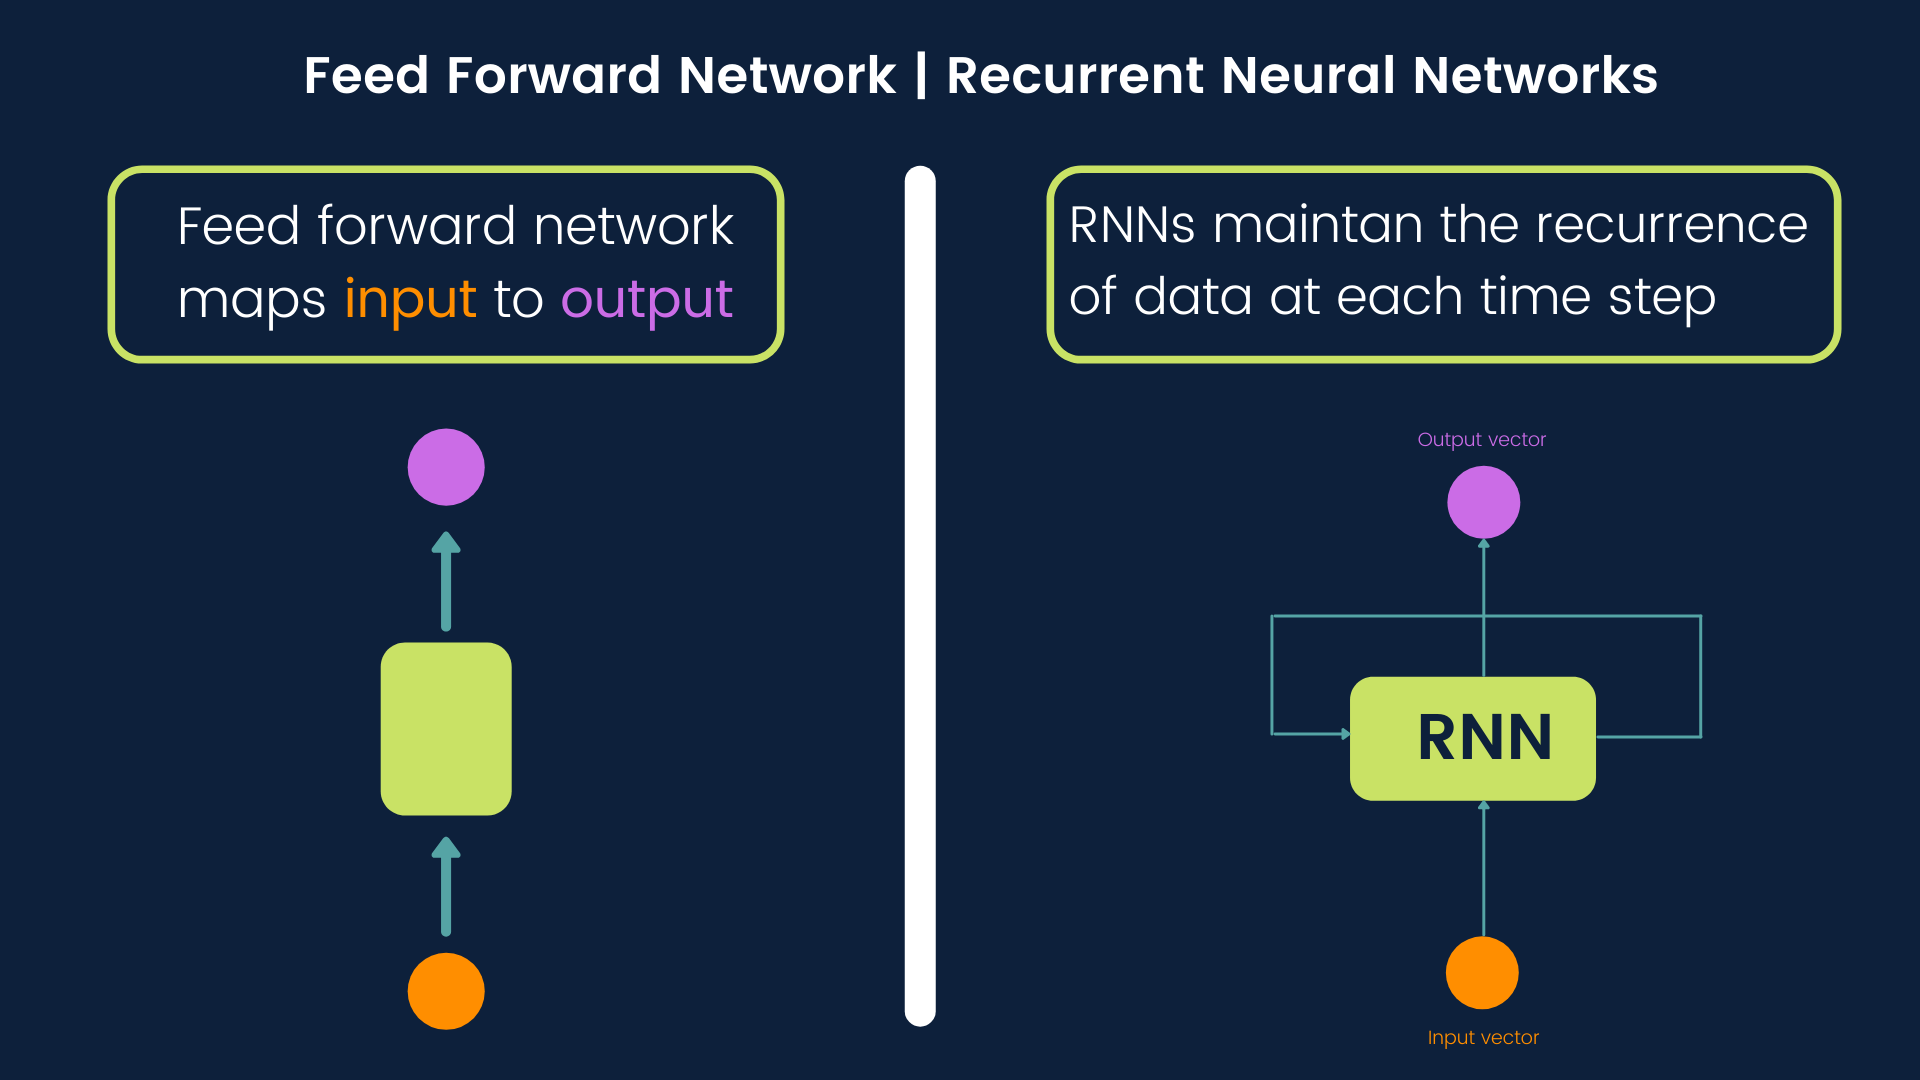

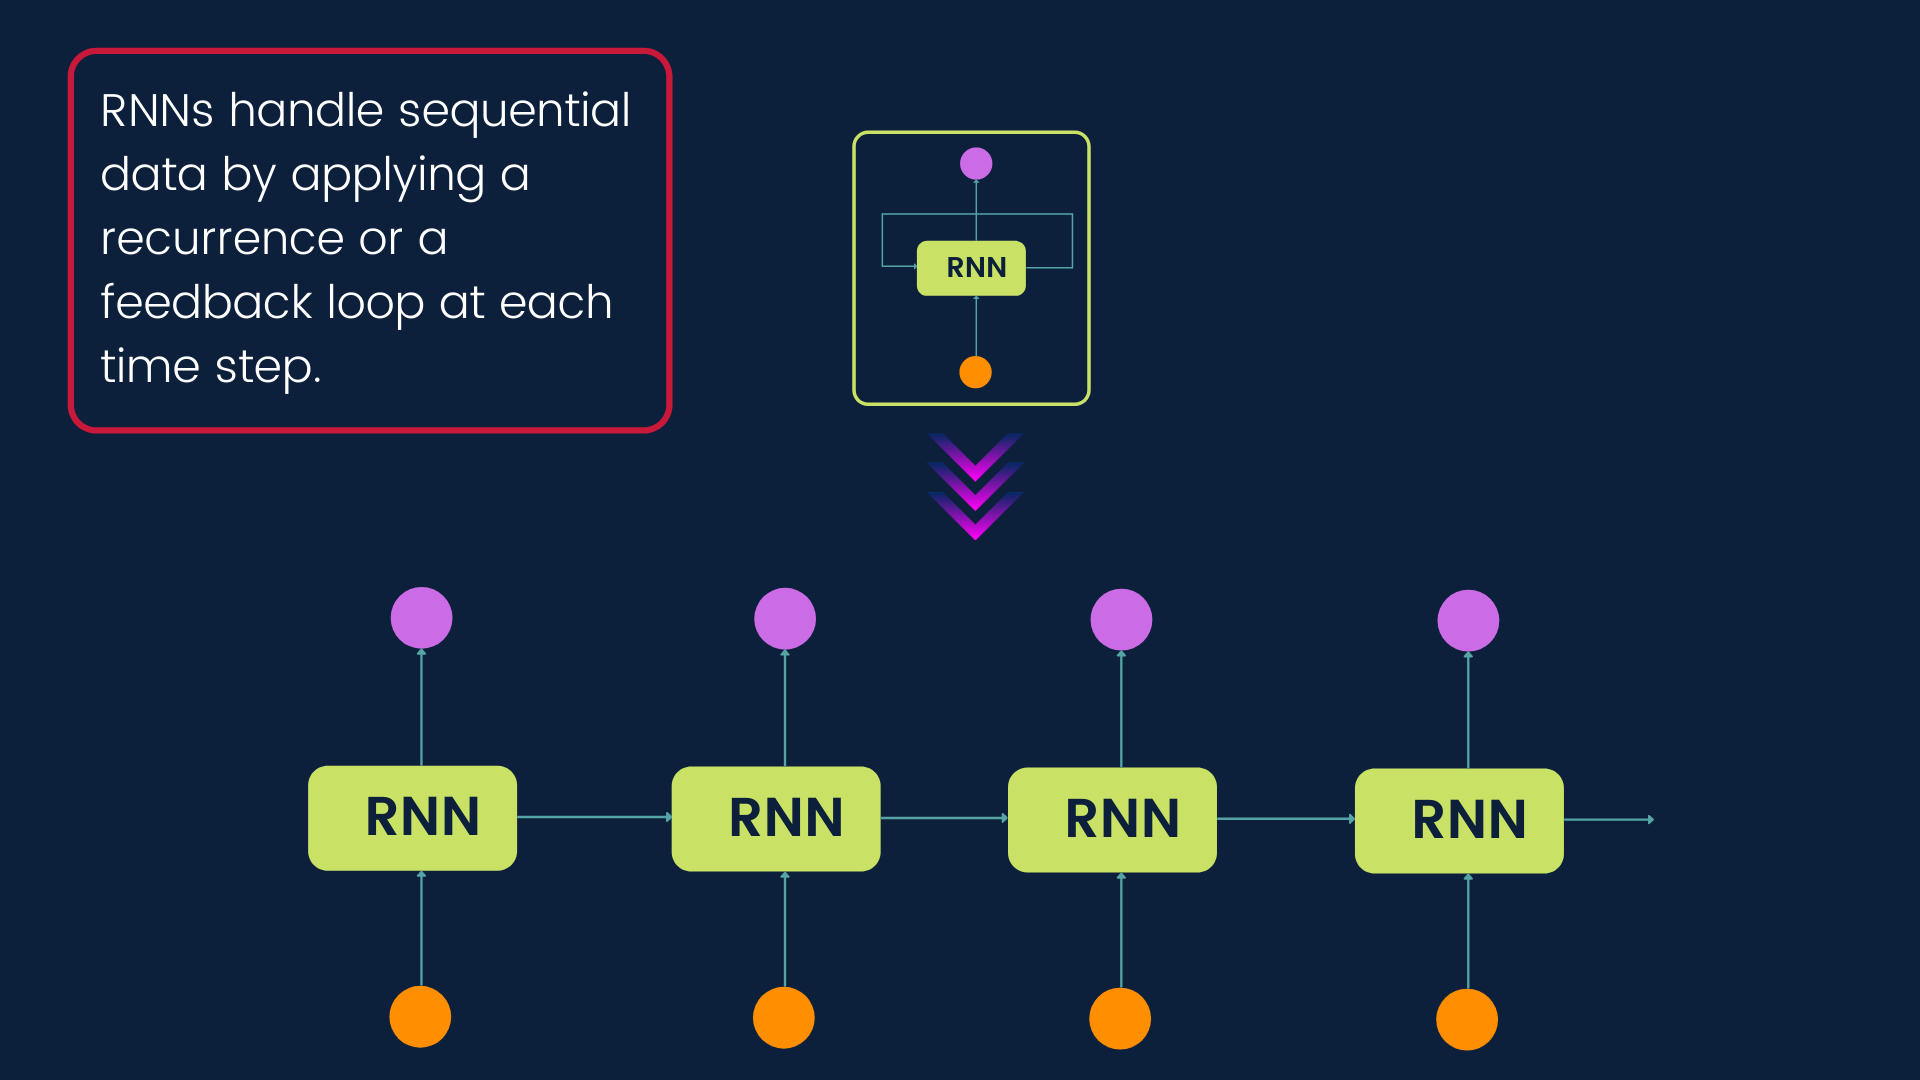

#### Applications of RNNs

RNNs can be used in any application that have the need of mantaining the recurrence of data.

Below are some of the RNN's applications:

* Machine translation
* Artificial music and text generation
* Sentiment analysis and text classification
* Medical signals analysis (such as ECG)
* Self driving cars trajectories

With that said, RNNs possesses some disadvantages. Because they have a small memory, they can not be able to track long term sequences. Also, they suffer from [vanishing and exploding gradients](https://www.youtube.com/watch?v=qhXZsFVxGKo). And these disadvantages motivates the other version of recurrent networks called Long Short Term Memories(LSTMs). More on LSTMs later. 

<a name='2'></a>

# 2. RNNs In Practice: Simple RNN

<a name='2-1'></a>

## 2.1 Getting the Data

We are going to use Imdb movie reviews dataset available in [Keras built in datasets.](https://keras.io/api/datasets/) 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
max_features = 20000
sequence_length = 200

(train_data, train_labels), (val_data, val_labels) = keras.datasets.imdb.load_data(num_words=max_features)

17473536/17464789 [==============================] - 0s 0us/step


Loading the training and validation data from Keras datasets. There are 25.000 samples for training and 25.000 samples for validation. 

Also, setting `max_features` to 20000 means we are only considering the first 20000 words, and `sequence_length` of 200 denotes that we will take the first 200 words in each movie review.

In [ ]:
train_data[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [ ]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

<a name='2-2'></a>

### 2.2. Preparing the Dataset

The Imdb dataset from Keras dataset is already prepared. The only thing left to do is to pad the tokenized sequences in order that all sentences/reviews have the same length, length equivalent to `sequence_length.`

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_data = pad_sequences(train_data, maxlen=sequence_length)
val_data = pad_sequences(val_data, maxlen=sequence_length)


<a name='2-3'></a>

### 2.3. Build, Compile and Train the Model

The basic RNN is implemented in Keras as a layer. There are more [recurrent layers (LSTMs and GRUs)](https://keras.io/api/layers/recurrent_layers/) that we will see later, but for now we are going to use [`SimpleRNN`](https://keras.io/api/layers/recurrent_layers/) to classify the movie reviews. 

Here is the overview of the Keras SimpleRNN layer. We will have a high level understandingof its some important arguments.

```

tf.keras.layers.SimpleRNN(
    units,
    activation="tanh",
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False
)
```

* **units**: A positive integer that denotes the dimension of the output.

* **activation**: The activation function to use. The default activation function is `tanh`. 

* **dropout**: A float between 0 and 1 denoting the percentage of units or neurons to drop for the linear transformation of the input. 

* **recurrent_dropout**: A float between 0 and 1 denoting the percentage of units or neurons to drop for the linear transformation of the recurrent state. 

* **return_state**: True or False. Denotes whether to return the last state in addition to the output.

* **go_backwards**: True or False. Denotes whether to process the input sequence backwards and return the reversed sequence. 

That's a few notes about the important parameters. For more about the SimpleRNN layer, there is a well documented help at [keras.io](https://keras.io/api/layers/recurrent_layers/simple_rnn/).


In [ ]:
simple_rnn = tf.keras.Sequential([
                          
  # Add an embedding layer to convert input tokens into a feature vector                  
  tf.keras.layers.Embedding(input_dim=max_features, output_dim=32, input_length=sequence_length),
  tf.keras.layers.SimpleRNN(32, return_sequences=True),
  tf.keras.layers.SimpleRNN(16, return_sequences=True),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling the model

simple_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
# Training the model 

history = simple_rnn.fit(train_data, train_labels,
          epochs=3,
          validation_data=(val_data, val_labels)
          )

Epoch 1/3
782/782 [==============================] - 486s 618ms/step - loss: 0.6143 - accuracy: 0.6478 - val_loss: 0.5477 - val_accuracy: 0.7082
Epoch 2/3
782/782 [==============================] - 483s 617ms/step - loss: 0.5089 - accuracy: 0.7352 - val_loss: 0.5863 - val_accuracy: 0.6944
Epoch 3/3
782/782 [==============================] - 481s 615ms/step - loss: 0.6491 - accuracy: 0.6101 - val_loss: 0.6275 - val_accuracy: 0.6383


<a name='2-4'></a>

### 2.4. Visualizing the Model Results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# function to plot accuracy and loss

def plot_acc_loss(history):

  model_history = history.history
  acc = model_history['accuracy']
  val_acc = model_history['val_accuracy']
  loss = model_history['loss']
  val_loss = model_history['val_loss']
  epochs = history.epoch

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

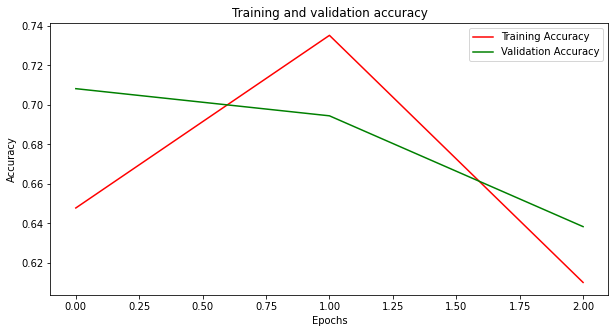

<Figure size 432x288 with 0 Axes>

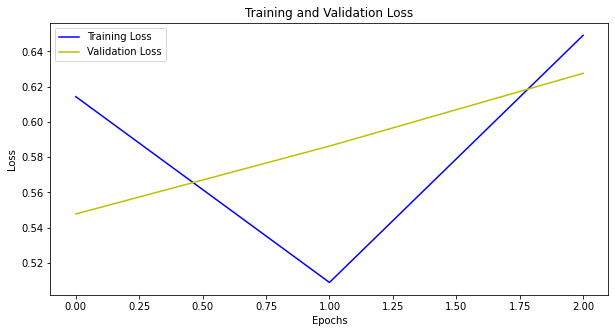

In [ ]:
plot_acc_loss(history)

The downside of RNNs is that they fail to process the long term sequences because their of limited memory. Due to having short term memory, the context will diminish over many time steps. 

In order to handle long term dependencies, another version of RNN called LSTMs were introduced. Because LSTMs perform really well on sequence datasets, Simple RNNs are longer used. 

<a name='3'></a>

# 3. Intro to Long Short Term Memory(LSTM)

LSTM is a recurrent neural network type that looks like Simple RNN cell, but it work very much better. In fact, we could have straightly used LSTM without bothering with a basic RNN cell, but hopefully that provided you with the foundations of the recurrent neural networks. And I believe [starting simple](https://jeande.medium.com/getting-started-with-machine-learning-a-learning-path-that-will-take-you-from-zero-to-hero-876545d38240) is always a best way to understand a hard topic.

While Simple RNN cell suffers from handling long sequences, LSTMs have the ability to store and preserve long term sequences over many time steps. A special design difference about LSTM cell is that it has a gate which is the basis of why it can control the flow of information over many time steps. 

In short, LSTM uses gates to control the flow of information from the current time step to next time step in the following 4 ways: 

  * The input gate recognizes the input sequence
  * Forget gate gets rid of all irrelevant information contained in the input sequence and store relevant information in long term memory
  * LTSM cell updates update cell's state values
  * Output gate controls the information that has to be sent to the next time step. 


The ability of LSTMs to handle long term sequences make it a suitable neural network architecture for various sequential tasks such as speech recognition, image caption generation, machine translation, and language modelling. 


Here is a great illustration of LTSMs architecture taken from [MIT Intro to Deep Learning](http://introtodeeplearning.com). MIT Intro Deep Learning is a recommended course to learn more about sequence modelling. 


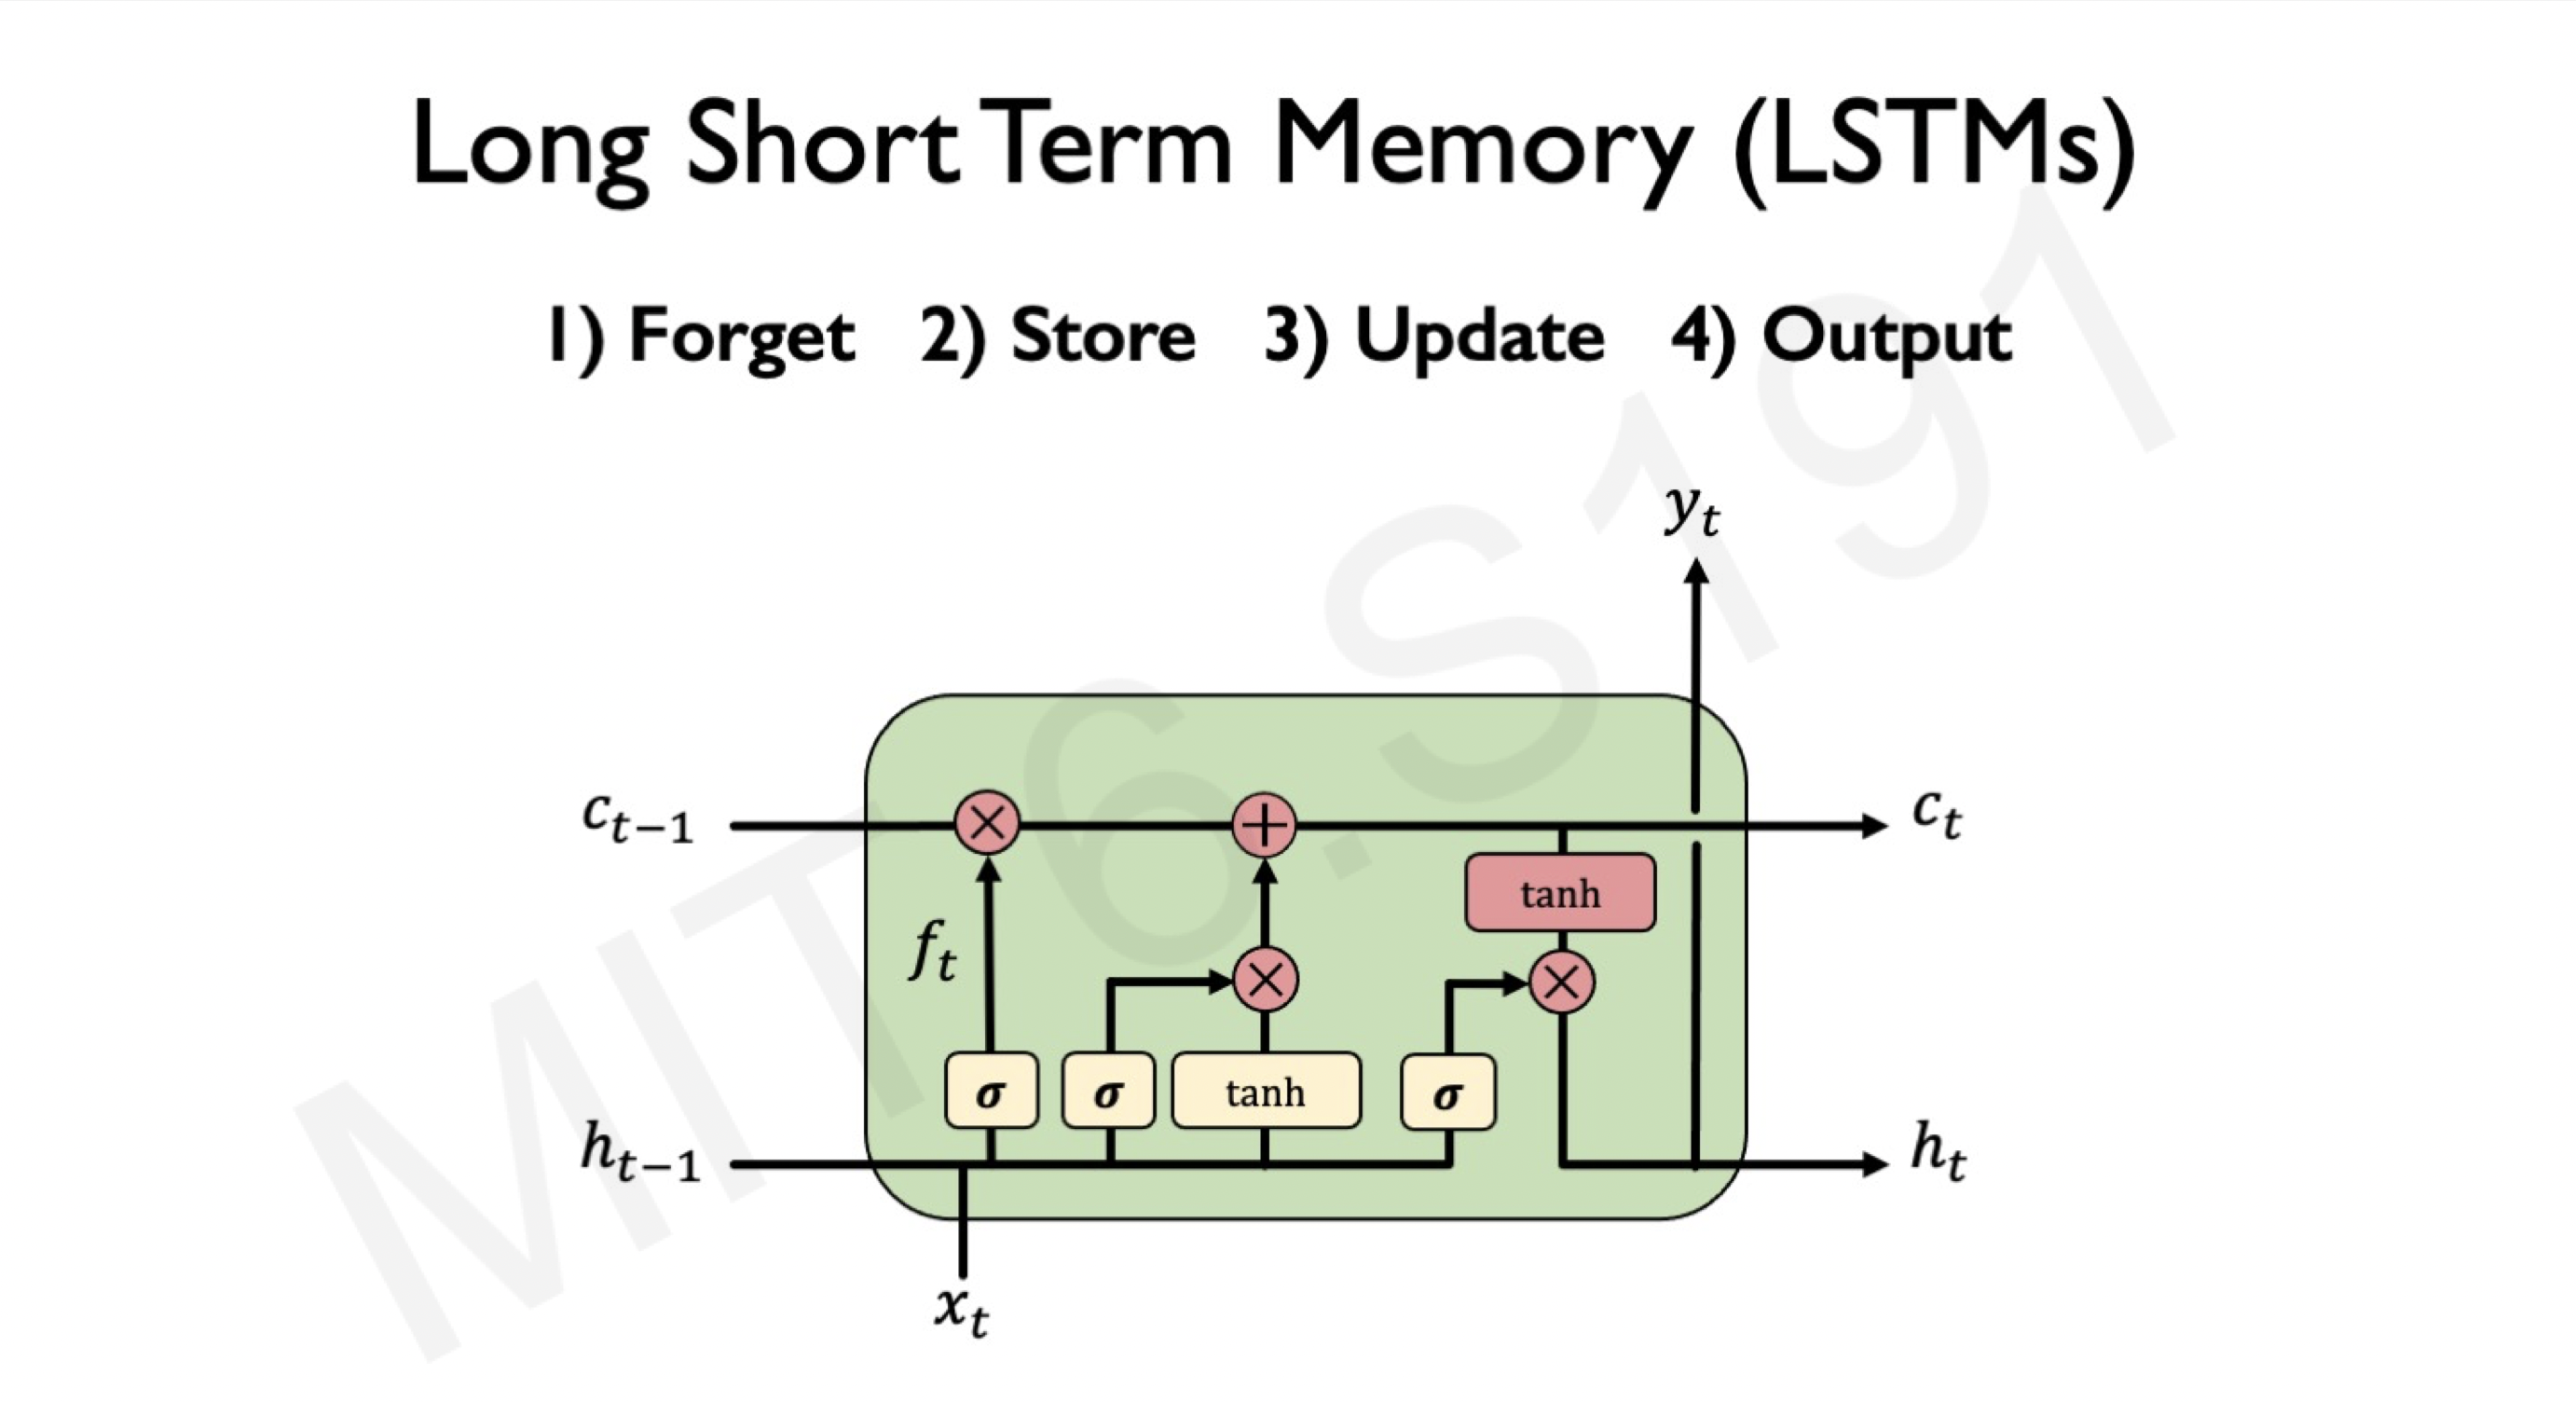

Here is also [a great paper](https://arxiv.org/pdf/1409.2329.pdf) that you can use to learn more about LSTMs. 

Let's put that into practice.

<a name='4'></a>

# 4. LSTMs in Practice : News Classification

<a name='4-1'></a>

## 4.1 Getting the Data

In the quest of learning LTSMs, we are going to use `ag_news_subset` dataset that is available in [TensorFlow datasets](https://www.tensorflow.org/datasets/catalog/ag_news_subset). TensorFlow datasets is a collection of awesome datasets that can be used right away with little preparations. 

AG is a collection of more than 1 million news articles gathered from more than 2000 news sources by ComeToMyHead in more than 1 year of activity. 

The AG dataset contains 4 classes that are: World(0), Sports(1), Business(2), Sci/Tech(3). The total number of training samples is 120,000 and testing 7,600. Each class contains 30,000 training samples and 1,900 testing samples. 

You can learn more about the dataset [here](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html), or read the orginal paper that used it to explore the use of [character-level convolutional networks (ConvNets) for text classification](https://arxiv.org/abs/1509.01626) by Xiang Zhang, Junbo Zhao, and Yann LeCun.

Let's get the dataset from TensorFlow datasets.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

The dataset that we are going to download has only one version so far. Let's specify it so that when it is updated, our lab will not be affected. If loading the data fails, run the cell again. It happens sometime when loading datasets from TF datasets.

In [ ]:
(train_data, val_data), info = tfds.load('ag_news_subset:1.0.0', #version 1.0.0
                                         split=['train', 'test'],
                                         with_info=True, 
                                         as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ag_news_subset/1.0.0.incompleteMVJXV1/ag_news_subset-train.tfrecord


  0%|          | 0/120000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/ag_news_subset/1.0.0.incompleteMVJXV1/ag_news_subset-test.tfrecord


  0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset ag_news_subset downloaded and prepared to /root/tensorflow_datasets/ag_news_subset/1.0.0. Subsequent calls will reuse this data.


Now that we have the data, we can look into some examples. This is always a good practice. 

Printing `info` that we loaded with the dataset, we can see pretty much everything we would need to know about the data. 

In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='ag_news_subset',
    version=1.0.0,
    description='AG is a collection of more than 1 million news articles.
News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity.
ComeToMyHead is an academic news search engine which has been running since July, 2004.
The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc),
information retrieval (ranking, search, etc), xml, data compression, data streaming,
and any other non-commercial activity.
For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .

The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above.
It is used as a text classification benchmark in the following paper:
Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advanc

In [ ]:
# Displaying the classes

class_names = info.features['label'].names
num_classes = info.features['label'].num_classes

print(f'The news are grouped into {num_classes} classes that are :{class_names}')

The news are grouped into 4 classes that are :['World', 'Sports', 'Business', 'Sci/Tech']


In [ ]:
num_train = info.splits['train'].num_examples
num_val = info.splits['test'].num_examples

print(f'The number of training samples: {num_train} \nThe number of validation samples: {num_val}')

The number of training samples: 120000 
The number of validation samples: 7600


We can also display the first 10 news samples. We can use [`tfds.as_dataframe`](https://www.tensorflow.org/datasets/api_docs/python/tfds/as_dataframe) to display them as dataframe.

In [ ]:
news_df = tfds.as_dataframe(train_data.take(10), info)

news_df.head(10)

,description,label
0,b'AMD #39;s new dual-core Opteron chip is desi...,3
1,b'Reuters - Major League Baseball\\Monday anno...,1
2,b'President Bush #39;s quot;revenue-neutral q...,2
3,b'Britain will run out of leading scientists u...,3
4,"b'London, England (Sports Network) - England m...",1
5,b'TOKYO - Sony Corp. is banking on the \\$3 bi...,0
6,b'Giant pandas may well prefer bamboo to lapto...,3
7,"b'VILNIUS, Lithuania - Lithuania #39;s main pa...",0
8,b'Witnesses in the trial of a US soldier charg...,0
9,"b'Dan Olsen of Ponte Vedra Beach, Fla., shot a...",1


Let's display some full news.

In [ ]:
for i in range (0,4):

  print(f"Sample news {i}\n \
  Label: {news_df['label'][i]} {(class_names[i])}\n \
  Description: {news_df['description'][i]}\n----------\n")

Sample news 0
   Label: 3 World
   Description: b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'
----------

Sample news 1
   Label: 1 Sports
   Description: b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.'
----------

Sample news 2
   Label: 2 Business
   Description: b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.'
----------

Sample news 3
   Label: 3 Sci/Tech
   Description: b'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.'
----------



In [ ]:
news_df.columns

Index(['description', 'label'], dtype='object')

Now that we understand the data, let's prepare it before we can use LSTMs to classify the news.  

<a name='4-2'></a>

## 4.2 Preparing the Data

We can not feed the raw texts that we loaded from the tensorflow datasets to the model. We have to do some preps works.

One of the major thing we have to do is to vectorize the texts or convert them into numeric tokens. 

We will use [TextVectorizer](https://keras.io/api/layers/preprocessing_layers/text/text_vectorization/), but before we get there, let's first shuffle and batch the training data. 

For validation data, we don't shuffle. We only batch it.

In [ ]:
buffer_size = 1000
batch_size = 32

train_data = train_data.shuffle(buffer_size)
train_data = train_data.batch(batch_size).prefetch(1)
val_data = val_data.batch(batch_size).prefetch(1)

In [ ]:
for news, label in train_data.take(1):

  print(f'Sample news\n----\n {news.numpy()[:4]} \n----\nCorresponding labels: {label.numpy()[:4]}')

Sample news
----
 [b'Macs still have fewer bugs than Windows PCs, but Apple moves to plug security holes before problems crop up.'
 b'Mexican stocks fell early Monday, dragged lower by cement giant Cemex (CX) after it announced a multibillion dollar acquisition of a British company, the largest by a Mexican firm ever.'
 b'The update for the e-mail program focuses mainly on security enhancements and adds a feature dubbed ScamWatch, which aims to combat "phishing" on the Internet.'
 b'Eight eBay sellers were ordered to pay nearly \\$90,000 (euro 70,000) in restitution and fines after admitting they bid up products online to inflate the prices.'] 
----
Corresponding labels: [3 2 3 2]


As you can see from the above, the training data is in batches of descriptions and their corresponding labels.

Now, we can use Keras [TextVectorization layer](https://keras.io/api/layers/preprocessing_layers/text/text_vectorization/) to handle all preprocessing. It will convert the texts into tokens, convert them into sequences, padd the sequences. It also removes punctuations and lower the case. 

That's all it does by default.

In [ ]:
max_features = 20000

text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=max_features)

After creating the layer, we can use `adapt` to pass the dataset throught it. Notice that we use `lambda function` to get the description separated from the label.

In [ ]:
text_vectorizer.adapt(train_data.map(lambda description, label : description))

We can get the vocabulary. Vocabulary is the list of individual words making up a particular sentence.

In [ ]:
vocab = text_vectorizer.get_vocabulary()
vocab[:10]

['', '[UNK]', 'the', 'a', 'to', 'of', 'in', 'and', 'on', 'for']

Let's pass some new sentences to `text_vectorizer`. The vectorized sequences will be padded with the maximum sentences, but if you want to hava fixed size, you can set the `output_sequence_length` to any value in the layer initialization.

In [ ]:
sample_news = ['This weekend there is a sport match between Man U and Fc Barcelona',
               'Tesla has unveiled its humanoid robot that appeared dancing during the show!']

               

In [ ]:
vectorized_news = text_vectorizer(sample_news)
vectorized_news.numpy()

array([[   40,   491,   185,    16,     3,  1559,   560,   163,   362,
        13418,     7,  7381,  2517],
       [    1,    20,   878,    14,     1,  4663,    10,  1249, 11657,
          159,     2,   541,     0]])

If you can look on the above tensors, the second sentence was padded with 0. Also the words `Tesla` and `humanoid` have an indice of 1 because they were not a part of the training data (that we adapted to the `text_vectorizer`). 

So this means that the indice 1 is reserved for all words that are new to the layer. In the vocabulary, these kind of words are replaced by `UNK`.

We are going to use the `text_vectorizer` as part of the model.

<a name='4-3'></a>

## 4.3 Creating and Training the Model

We are going to create a Keras Sequential model that takes the texts input and output the class of the input texts.

The model is going to be made of the following layers:

* `TextVectorization layer` for converting input texts into tokens.
* `Embedding layer` for representing the tokens into a trainable feature vector of a high dimensional space. Because the feature vector is trainable, after training the words that have the same semantic meaning will end up having the same vectors (and pointing to the same directions).
* `A recurrent neural network (RNN), LSTMs specifically` for processing the sequences. LTSMs are well suited for long sequences and as we saw earlier, SimpleRNN suffers from long term dependencies. We will also wrapp the LSTM layer into [Bidirectional layer](https://keras.io/api/layers/recurrent_layers/bidirectional/ in order to be able to process the sequences from both directions (forward and backward).

* `Dense layer` for classification purpose. It takes the vector and convert it into a single logit output.

In [ ]:
input_dim = len(text_vectorizer.get_vocabulary())
input_dim 

20000

In [ ]:
model = tf.keras.Sequential([
    text_vectorizer,
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(train_data, 
                    epochs=5,
                    validation_data=val_data
)

Epoch 1/5
3750/3750 [==============================] - 237s 42ms/step - loss: 0.3305 - accuracy: 0.8843 - val_loss: 0.2703 - val_accuracy: 0.9075
Epoch 2/5
3750/3750 [==============================] - 155s 41ms/step - loss: 0.2021 - accuracy: 0.9300 - val_loss: 0.3008 - val_accuracy: 0.9061
Epoch 3/5
3750/3750 [==============================] - 155s 41ms/step - loss: 0.1333 - accuracy: 0.9527 - val_loss: 0.3692 - val_accuracy: 0.9036
Epoch 4/5
3750/3750 [==============================] - 155s 41ms/step - loss: 0.0812 - accuracy: 0.9704 - val_loss: 0.4574 - val_accuracy: 0.9032
Epoch 5/5
3750/3750 [==============================] - 157s 42ms/step - loss: 0.0506 - accuracy: 0.9817 - val_loss: 0.5542 - val_accuracy: 0.8955


In [ ]:
# Evaluating the model

eval_loss, eval_acc = model.evaluate(val_data)
print(f'Loss on validation data: {eval_loss}\n Accuracy on Validation data: {eval_acc}')

238/238 [==============================] - 4s 18ms/step - loss: 0.5542 - accuracy: 0.8955
Loss on validation data: 0.5541531443595886
 Accuracy on Validation data: 0.8955262899398804


<a name='4-4'></a>

## 4.4 Visualizing the Results

Let's now visualize the results of the training.

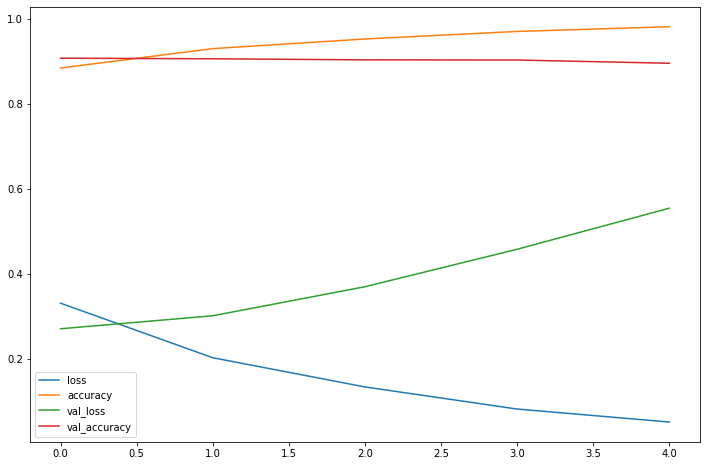

In [ ]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))

<a name='4-5'></a>

## 4.5 Stacking LSTMs Layers

In [ ]:
model = tf.keras.Sequential([
    text_vectorizer,
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(train_data, 
                    epochs=5,
                    validation_data=val_data
)

Epoch 1/5
3750/3750 [==============================] - 334s 73ms/step - loss: 0.4098 - accuracy: 0.8626 - val_loss: 0.2883 - val_accuracy: 0.9051
Epoch 2/5
3750/3750 [==============================] - 271s 72ms/step - loss: 0.2557 - accuracy: 0.9201 - val_loss: 0.2944 - val_accuracy: 0.9038
Epoch 3/5
3750/3750 [==============================] - 269s 72ms/step - loss: 0.1988 - accuracy: 0.9360 - val_loss: 0.3246 - val_accuracy: 0.9022
Epoch 4/5
3750/3750 [==============================] - 268s 72ms/step - loss: 0.1455 - accuracy: 0.9522 - val_loss: 0.4522 - val_accuracy: 0.8974
Epoch 5/5
3750/3750 [==============================] - 272s 72ms/step - loss: 0.1078 - accuracy: 0.9641 - val_loss: 0.4931 - val_accuracy: 0.8974


In [ ]:
# Evaluating the model

eval_loss, eval_acc = model.evaluate(val_data)
print(f'Loss on validation data: {eval_loss}\n Accuracy on Validation data: {eval_acc}')

238/238 [==============================] - 7s 27ms/step - loss: 0.4931 - accuracy: 0.8974
Loss on validation data: 0.49308159947395325
 Accuracy on Validation data: 0.8973684310913086


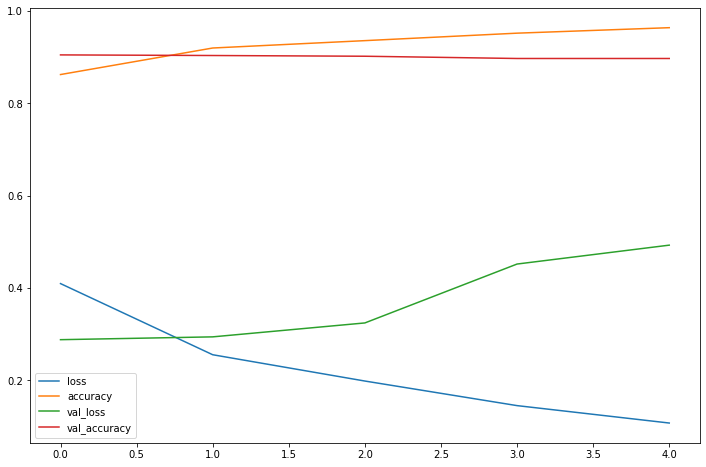

In [ ]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))

In [ ]:
# Predicting the class of new news

sample_news = ['The self driving car company Tesla has unveiled its humanoid robot that appeared dancing during the show!']

sample_news = np.array(sample_news)

predictions = model.predict(sample_news)

predicted_class = np.argmax(predictions)

print(f'predicted class: {predicted_class} \nPredicted Class name: {class_names[predicted_class]}')


predicted class: 3 
Predicted Class name: Sci/Tech


Obviously, our model tried to learn that the the provided sample news is tech or science. 

In [ ]:
# Predicting the class of new news

sample_news = ['This weekend there is a match between two big footbal teams in the national league']
sample_news = np.array(sample_news)

predictions = model.predict(sample_news)

predicted_class = np.argmax(predictions)

print(f'predicted class: {predicted_class} \nPredicted Class name: {class_names[predicted_class]}')


predicted class: 1 
Predicted Class name: Sports


And again it also able to learn that the provided news is sports type and that's obvious. 

<a name='4-6'></a>

## 4.6 Using Gate Recurrent Unit(GRU)

Gate Recurrent Unit or GRU are almost similar to LSTMs but they are cheaper to run compared to LSTMs. Here is a [paper](https://arxiv.org/abs/1406.1078) that introduced it if you would like to learn more. 

Like LSTMs, and SimpleRNNs, GRU is also implemented in Keras as a layer. Learn more about it on [Keras documentation](https://keras.io/api/layers/recurrent_layers/gru/).

In [ ]:
model = tf.keras.Sequential([
    text_vectorizer,
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.1), 
    tf.keras.layers.GRU(64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(train_data, 
                    epochs=5,
                    validation_data=val_data
)

Epoch 1/5
3750/3750 [==============================] - 697s 185ms/step - loss: 0.3557 - accuracy: 0.8750 - val_loss: 0.2788 - val_accuracy: 0.9051
Epoch 2/5
3750/3750 [==============================] - 692s 184ms/step - loss: 0.2300 - accuracy: 0.9220 - val_loss: 0.2925 - val_accuracy: 0.9042
Epoch 3/5
3750/3750 [==============================] - 692s 185ms/step - loss: 0.1876 - accuracy: 0.9359 - val_loss: 0.2956 - val_accuracy: 0.9070
Epoch 4/5
3750/3750 [==============================] - 685s 183ms/step - loss: 0.1517 - accuracy: 0.9474 - val_loss: 0.3269 - val_accuracy: 0.9017
Epoch 5/5
3750/3750 [==============================] - 688s 183ms/step - loss: 0.1209 - accuracy: 0.9578 - val_loss: 0.3570 - val_accuracy: 0.9033


You see even with using dropouts within recurrent layers didn't improve the performance. The validation set is resonably small. One can try to increase it and see if that might increase the performance on the validation set. 

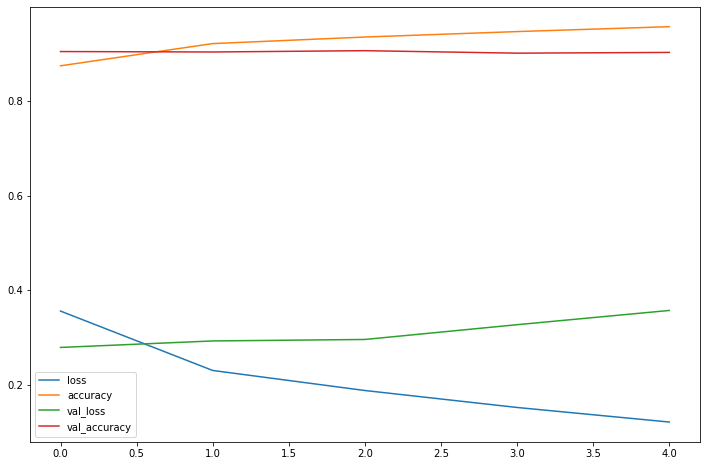

In [ ]:
import matplotlib.pyplot as plt

loss_acc_df = pd.DataFrame(history.history)

loss_acc_df.plot(figsize=(12,8))

<a name='5'></a>

# 5. Futher Learning

This notebook has introduced Recurrent Neural Networks or RNNs. RNNs are suitable networks for natural language processing and all sequencial applications in general. We have seen different types of recurrent networks such as basic RNN cell, Long Short Term Memory(LSTM), and Gate Recurrent Unit(GRU). 

If you would like to learn more about sequence models, I recommend the following courses:

* Deep Learning Specialization - Course 5 of Sequence models. This course is available on [Coursera](https://www.coursera.org/learn/nlp-sequence-models) and [Youtube](https://www.youtube.com/watch?v=_i3aqgKVNQI&list=PLkDaE6sCZn6F6wUI9tvS_Gw1vaFAx6rd6). 
* Intro to Deep Learning MIT - Lecture 2 of Recurrent Neural Networks, available on [Youtube](https://www.youtube.com/watch?v=qjrad0V0uJE&t=168s). 

## [BACK TO TOP](#0)